# ICD Tokenize

The data set is a list of ICD labels and their descriptions. The goal is to tokenize the descriptions and train a model to predict the ICD labels.

In [2]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

In [3]:
df = pd.read_csv('data.csv')
display(df)

,id,catalogs,text
0,0,['急性腎衰竭'],急性腎衰竭
1,1,['心室顫動'],心室顫動
2,2,['菌血症'],菌血症
3,3,['慢性腎臟疾病'],慢性腎臟疾病
4,4,"['冠狀動脈疾病', '心臟衰竭']",冠狀動脈疾病、繞道手術後、心臟衰竭
...,...,...,...
624542,624542,['腦惡性腫瘤'],腦惡性腫瘤
624543,624543,['呼吸衰竭'],呼吸衰竭
624544,624544,['肺炎'],肺炎
624545,624545,['支氣管狹窄'],支氣管狹窄


Most of the description only labels one or two ICD labels.

<Axes: xlabel='text'>

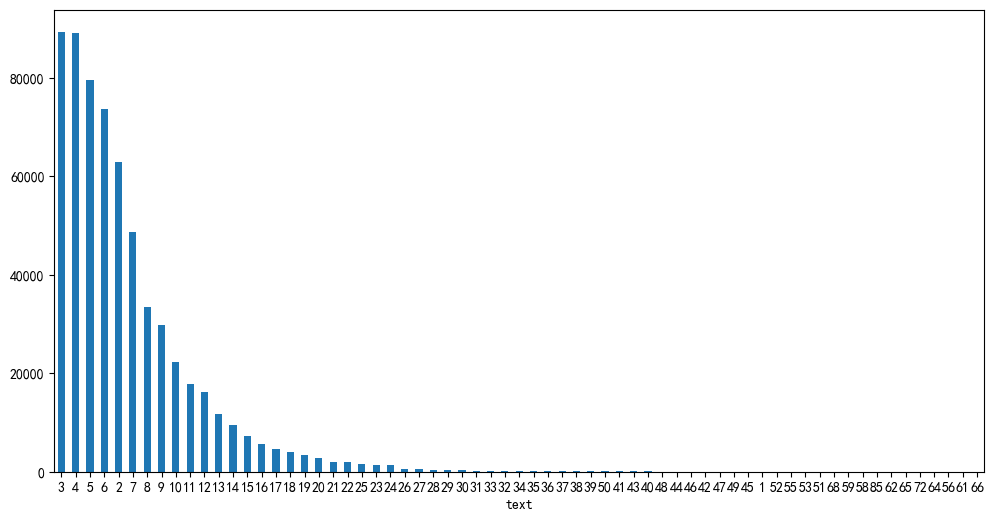

In [4]:
display(df['text'].str.len().value_counts().plot(kind='bar', rot=0, figsize=(12, 6)))

<Axes: >

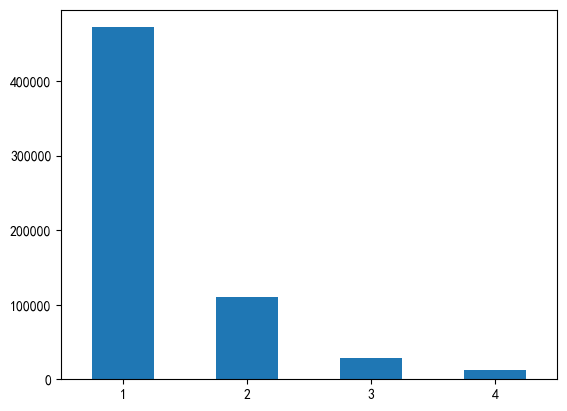

In [5]:
catalogs = [eval(labels) for labels in df['catalogs'].tolist()]
lengths = [len(catalog) for catalog in catalogs]
display(pd.Series(lengths).value_counts().plot(kind='bar', rot=0))

The labels are highly imbalanced. One possible solution is to trim the labels that have less than 1000 samples and that others to use text matching method.

肺炎           62954
高血壓          38095
呼吸衰竭         36759
心肺衰竭         35453
糖尿病          34728
             ...  
髂總動脈假性動脈瘤        1
鼠蹊膿瘍             1
腰薦椎神經叢病灶         1
惡性血管瘤            1
肛門裂傷             1
Name: count, Length: 14909, dtype: int64

<Axes: >

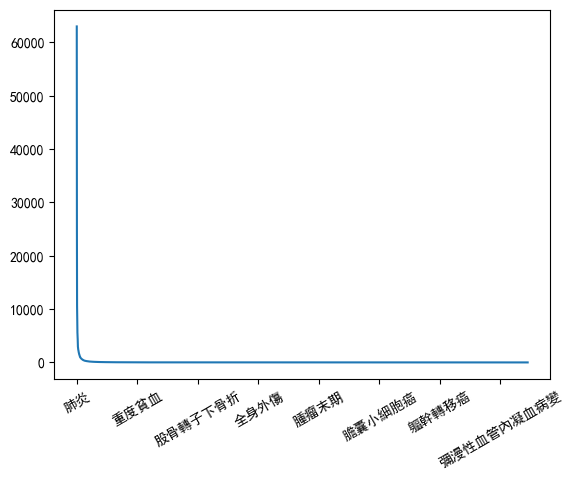

In [6]:
labels = [label for catalog in catalogs for label in catalog]
value_counts = pd.Series(labels).value_counts()
display(value_counts)
display(value_counts.plot(rot=30))

In [7]:
mlb = MultiLabelBinarizer(sparse_output=True)
catalogs = mlb.fit_transform(catalogs)
display(catalogs)

<624547x14909 sparse matrix of type '<class 'numpy.int32'>'
	with 831410 stored elements in Compressed Sparse Row format>